# SyriaTel Communications Project: Customer Churn (Binary Classification)

### Table of Contents

1. Introduction + Cleaning + EDA: Exploration of the data without intensive technologies. 
2. Modeling the Data
3. Question One
4. Question Two
5. Question Three
6. Conclusion: The findings repeated in a concise summary.

### Strategic Approach

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. What is the customer charge per minute when each customer pays the average charge per customer? 

# Question Two

# What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

The high number of minutes leading to customer churn in total day minutes and night minutes makes it obvious that customers who are using more minutes are having to pay more and therefore, looking elsewhere for more cost-effective solutions. Another concept to explore here is whether or not the customers are paying for voicemail plans or international plans. 

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from dtreeviz.trees import *
from sklearn import tree
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout



,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0


# The Conversion of Minutes to Revenue

Each type of minute has a different charge. Seemingly due to the technological difficulty with each time of day. However, when used as a multiple there is a pretty large disparity between 4x and 17x or 27x.

- Day Minutes are roughly 17 cents per minute
- Evening Minutes are roughly 18 cents per minute
- Night Minutes are roughly 4 cents per minute
- International Minutes are roughly 27 cents per minute

### Total Number of Mins by Type

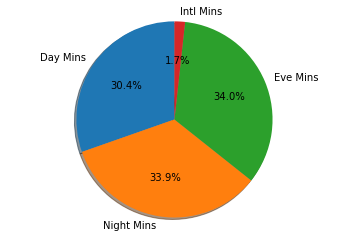

In [73]:
labels = 'Day Mins', 'Night Mins', 'Eve Mins', 'Intl Mins'
sizes = [599190, 669507, 669868, 34121]
explode = (0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Total Revenue by Minute Type

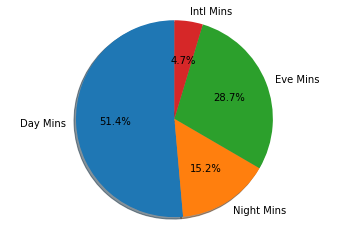

In [74]:

labels = 'Day Mins', 'Night Mins', 'Eve Mins', 'Intl Mins'
sizes = [101864, 30128, 56939, 9214]
explode = (0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Cost and Revenue

Future analysis with more data could determine the profit, costs, and determine if a better pricing model would reduce churn.

### Churn Numbers

The current percentage of churn is at 14.49%. This means that each percentage point represents 33 customers. To reduce churn to a reasonable about of around 7%, SyriaTel needs to retain 247 customers annually.

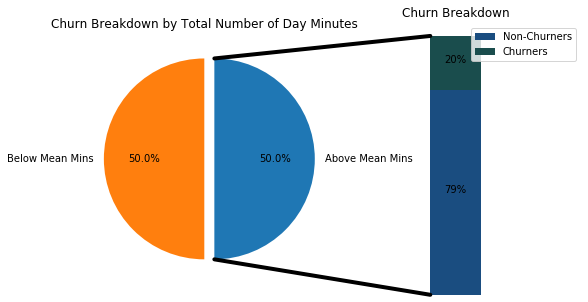

In [14]:
# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.50, .50]
labels = ['Above Mean Mins', 'Below Mean Mins']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.79, .21]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')
ax1.set_title('Churn Breakdown by Total Number of Day Minutes')
ax2.set_title('Churn Breakdown')
ax2.legend(('Non-Churners', 'Churners'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [15]:
one_hot_df.churn.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [16]:
one_hot_df.churn.value_counts(normalize = True)

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64

# Conclusion

The customers with an above average number of day minutes have been linked to being likely to churn. There are 293 of them. SyriaTel needs to reduce churn by 247 customers annually. By offering customers plans with flat monthly fees, SyriaTel will be able to reduce this churn and potentially save over $25,000.

# Future Work

This is one of many proposed solutions for decreasing churn that are easily accessible. Future work into understanding SyriaTel's contracts with customers would further assist in determining why customer retention is lacking. 